## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

## Cargar los datos

Abrir el archivo "diabetes.csv" en la carpeta "data". Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?
*   ¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.

### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba.

In [3]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules.funciones_auxiliares import plot_decision_regions
from sklearn.model_selection import train_test_split

In [4]:
datos = pd.read_csv('data/diabetes.csv')

#EXPLORACIÓN DE LOS DATOS:
#¿Cuántas instancias o ejemplos tiene el dataset?
datos.shape
print("El dataset de diabetes tiene", len(datos), " instancias")
datos.describe() #resumen de atributos numéricos

#¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
#La variable de salida se llama "Outcome" y es de tipo "int64"


El dataset de diabetes tiene 768  instancias


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,767.000000,756.000000,763.000000,767.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.195567,20.862434,80.322412,32.034289,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.206609,15.865314,115.439459,7.804050,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,128.500000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes en algún atributo?
d_faltantes = datos.isnull().sum()
d_faltantes = d_faltantes[d_faltantes>0]
print("Atributos con datos faltantes:", d_faltantes)

#Se detectan datos faltantes en los atributos: BloodPressure, SkinThickness,  Insulin y BMI

Atributos con datos faltantes: BloodPressure     1
SkinThickness    12
Insulin           5
BMI               1
dtype: int64


In [10]:
#¿Qué tipo de dato tiene cada atributo?
datos.info() #conocer los atributos existentes y el número de instancias pertenecientes a cada atributo

#¿Presenta algún atributo categórico? Si es así, cuántas categorías posee y cuántas instancias tiene en cada categoría.
#No presenta datos categóricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             767 non-null    float64
 4   SkinThickness             756 non-null    float64
 5   Insulin                   763 non-null    float64
 6   BMI                       767 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 60.1 KB


In [21]:
#Separo en datos de entrenamiento y prueba:
# Dividimos los datos en conjunto de entrenamiento y prueba
# 80% entrenamiento, 20% prueba
# stratify: para que la proporción de clases sea la misma en ambos conjuntos
# random_state: para que la división sea reproducible
x_train, x_test = train_test_split(datos, test_size=0.2, stratify=datos["Outcome"], shuffle=True, random_state=42)

print(x_train.shape)
print(x_test.shape)

(614, 10)
(154, 10)


Analice con cuidado el rango de valores de los atributos. ¿Nota valores atípicos a simple vista en algún/algunos de los atributos?

<Axes: >

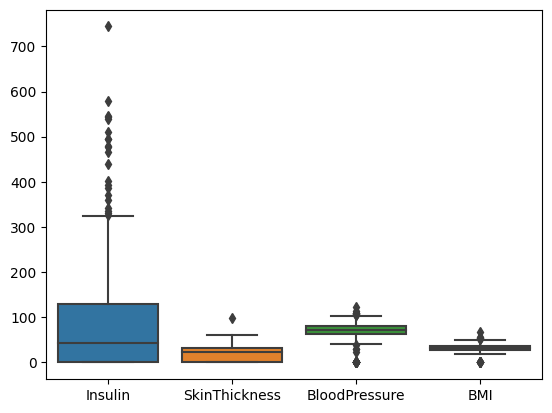

In [12]:
#encuentro valores atipicos en los datos de entrenamiento:  
sns.boxplot(data=x_train[["Insulin","SkinThickness","BloodPressure","BMI"]])

Estos valores atípicos encontrados a simple vista es mejor tratarlos como datos faltantes. Utilice el método **[replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)** de pandas para reemplazarlos por `np.NaN`



In [22]:
#uso el metodo replace para reemplazar los valores atipicos por NaN:
x_train['Glucose'] = x_train['Glucose'].replace(0, np.NaN)
x_train['BloodPressure'] = x_train['BloodPressure'].replace(0, np.NaN)
x_train['SkinThickness'] = x_train['SkinThickness'].replace(0, np.NaN)
x_train['Insulin'] = x_train['Insulin'].replace(0, np.NaN)
x_train['BMI'] = x_train['BMI'].replace(0, np.NaN)

x_test['Glucose'] = x_test['Glucose'].replace(0, np.NaN)
x_test['BloodPressure'] = x_test['BloodPressure'].replace(0, np.NaN)
x_test['SkinThickness'] = x_test['SkinThickness'].replace(0, np.NaN)
x_test['Insulin'] = x_test['Insulin'].replace(0, np.NaN)
x_test['BMI'] = x_test['BMI'].replace(0, np.NaN)

Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

In [15]:
#datos faltantes en los datos de entrenamiento:
print("Datos faltantes en los datos de entrenamiento:")
print(x_train.isnull().sum())

Datos faltantes en los datos de entrenamiento:
Unnamed: 0                    0
Pregnancies                   0
Glucose                       0
BloodPressure               290
SkinThickness               175
Insulin                     290
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [23]:
#datos faltantes en los datos de prueba:
print("Datos faltantes en los datos de testeo:")
print(x_test.isnull().sum())

Datos faltantes en los datos de entrenamiento:
Unnamed: 0                   0
Pregnancies                  0
Glucose                      1
BloodPressure               12
SkinThickness               52
Insulin                     84
BMI                          2
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


## Datos Faltantes

Grafique el histograma de cada atributo con datos faltantes y decida que valor utilizar (media o mediana) para imputar, en función de la distribución que tienen los datos. Utilice la función **fillna** de pandas ([Documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
Puede utilizar el parámetro alpha para darle transparencia a los histogramas y agregar una leyenda para identificar la clase.

### ⚠️
**Aclaración:** Algo a tener en cuenta en este ejemplo es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/ sin diabetes). Una persona sana tendrá un valor de insulina en un rango distinto a una persona no sana. Por tanto es recomendable graficar el histograma por atributo y por clase, de igual manera, calcular la media o mediana según la clase e imputar un valor teniendo en cuenta el mismo criterio.

Si lo deseea puede implementar su propio transformer para imputar datos de forma condicional, dependiendo de la clase y un pipeline para la preparación completa de los datos.

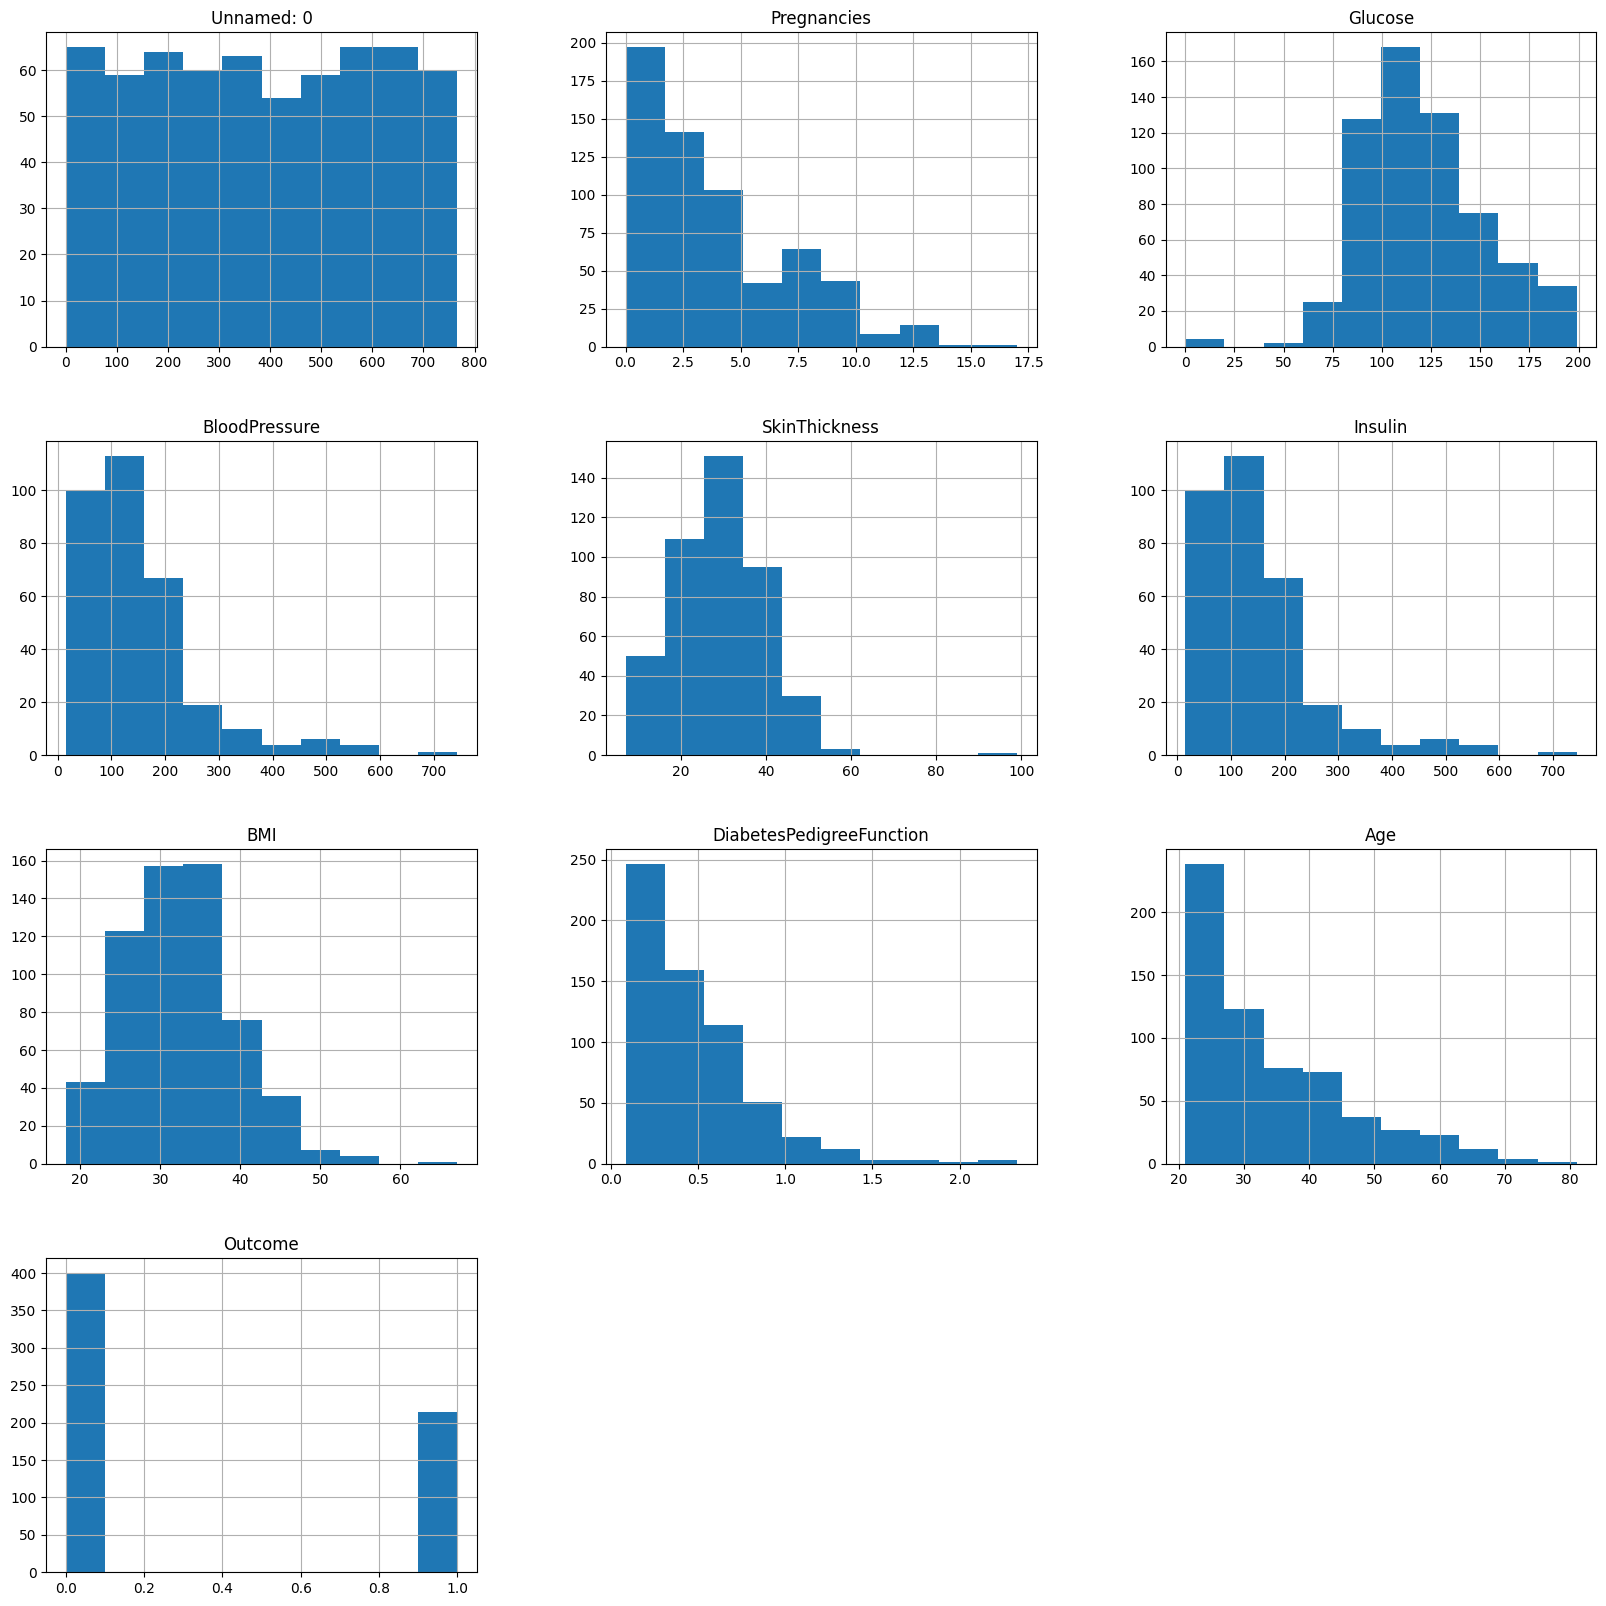

Media de los atributos según la clase:
         Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Outcome                                                                      
0        387.052500     3.315000  109.852500     122.302326      26.972603   
1        375.565421     4.761682  141.574766     201.889908      33.204082   

            Insulin        BMI  DiabetesPedigreeFunction        Age  
Outcome                                                              
0        122.302326  30.780153                  0.437522  31.285000  
1        201.889908  35.542453                  0.552019  37.257009  
-----------------------------------------
Mediana de los atributos según la clase:
         Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  \
Outcome                                                                   
0             394.0          2.0    108.0          100.0           27.0   
1             352.5          4.0    141.0          168.0    

In [16]:
#histograma de cada atributo y por clase con datos faltantes:
x_train.hist(figsize=(20,20))
plt.show()
#calcular la media o mediana según la clase
print("Media de los atributos según la clase:")
print(x_train.groupby('Outcome').mean())
print("-----------------------------------------")
print("Mediana de los atributos según la clase:")
print(x_train.groupby('Outcome').median())




In [35]:
#uso fillna para reemplazar los valores NaN por la media de cada atributo:
x_train['Glucose'].fillna(x_train['Glucose'].mean(), inplace=True)
x_train['Insulin'].fillna(x_train['Insulin'].mean(), inplace=True)
x_train['BMI'].fillna(x_train['BMI'].mean(), inplace=True)
x_train['BloodPressure'].fillna(x_train['BloodPressure'].mean(), inplace=True)


In [38]:
#Separo la variable target del resto de los atributos
diabetes_train_target = x_train['Outcome']
diabetes_train = x_train.drop('Outcome', axis = 1)


#Estandarizo los datos de entrenamiento:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sscal_train = sc.fit_transform(x_train)


Después de la preparación de datos, entrene 3 clasificadores (KNN, LDA, SVM con kernel gaussiano) y compare sus desempeños (usando la métrica de Accuracy).

In [37]:
#entreno clasificador knn:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p = 2, metric='minkowski')
knn.fit(sscal_train, diabetes_train_target)

#uso el accuracy para evaluar el modelo:
print("Accuracy en datos de entrenamiento:", knn.score(x_train[['Glucose','Insulin','BMI','BloodPressure']], x_train['Outcome']))


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
#entreno calsificador lda:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(x, x_train['Outcome'])

from sklearn.discriminant_analysis import 

lda = LinearDiscriminantAnalysis ()
lda.fit_transform(sscal_train, df_train_y)


#uso el accuracy para evaluar el modelo:
print("Accuracy en datos de entrenamiento:", lda.score(x_train[['Glucose','Insulin','BMI','BloodPressure']], x_train['Outcome']))


Accuracy en datos de entrenamiento: 0.7752442996742671


In [20]:
#entreno clasificador svm con kernel gaussiano:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train[['Glucose','Insulin','BMI','BloodPressure']], x_train['Outcome'])
#uso el accuracy para evaluar el modelo:
print("Accuracy en datos de entrenamiento:", svm.score(x_train[['Glucose','Insulin','BMI','BloodPressure']], x_train['Outcome']))


Accuracy en datos de entrenamiento: 0.9234527687296417
